## Visualize grid 2 in the real example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time

from itertools import permutations
from functions import *

np.random.seed(1234)

In [2]:
PATH_START = (121.46, 31.22) #(CNWGQ: 31.22N, 121.46E) 
PATH_END = (174.77, -36.87) #(NZAKL: 36.87S 174.77E)
THRESHOLD = 0.5

In [3]:
file_list = os.listdir('out')
file_list.sort()

In [4]:
grid_list = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        with open(os.path.join('out', file_name), 'r') as f:
            grid = np.genfromtxt(f, delimiter=',')
            grid_list.append(grid)

In [5]:
grid_list_reshape = []
for grid in grid_list:
    if len(grid.shape) == 1:
        grid = grid.reshape(-1,1)
    grid_list_reshape.append(grid)

grid_list = grid_list_reshape

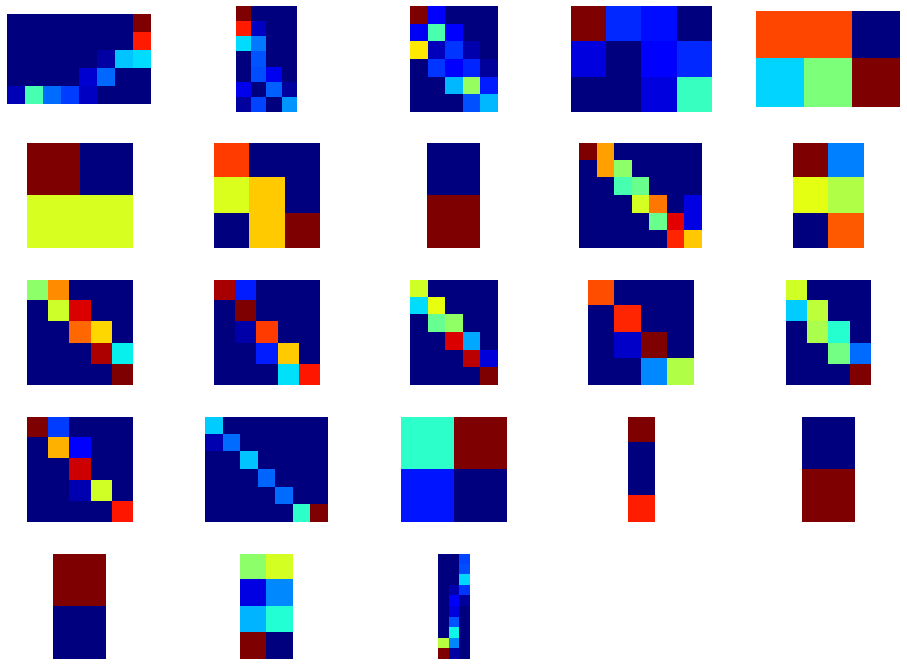

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(16,12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

i = 0
for row in ax:
    for col in row:
        if i == len(grid_list):
            col.plot()
            col.axis('off')
            continue
        col.imshow(grid_list[i], cmap='jet')
        #for (j,i),label in np.ndenumerate(grid_list[i]):
        #    col.text(i,j,int(label),ha='center',va='center')
        col.axis('off')
        i += 1

In [7]:
import pickle

out_name = 'out/grid_info_list'
with open(out_name, 'rb') as f:
    grid_info_list = pickle.load(f)
    
out_name = 'out/best_route_list'
with open(out_name, 'rb') as f:
    best_route_list = pickle.load(f)
    
out_name = 'out/boot_sample_list'
with open(out_name, 'rb') as f:
    boot_sample_list = pickle.load(f)

In [8]:
def get_n_routes(grid):
    n_routes = math.factorial(grid.shape[0]-1+grid.shape[1]-1)/math.factorial(grid.shape[0]-1)/math.factorial(grid.shape[1]-1)
    return int(n_routes)

In [9]:
nr, nc = (9,9)
X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
get_n_routes(X)

12870

In [10]:
X = grid_list[1]
X

array([[435.,   0.,   0.,   0.],
       [384.,  27.,   0.,   0.],
       [148., 106.,   0.,   0.],
       [  0.,  91.,   0.,   0.],
       [  0.,  87.,  43.,   0.],
       [ 42.,   0.,  96.,  12.],
       [ 12.,  84.,   0., 118.]])

In [11]:
(x_s, y_s, x_e, y_e, x_d, y_d) = grid_info_list[1]
X = grid_list[1]

[7, 0, 10, 6, 1, 1] (7, 4) 84
time (s): 0.43462361115962267


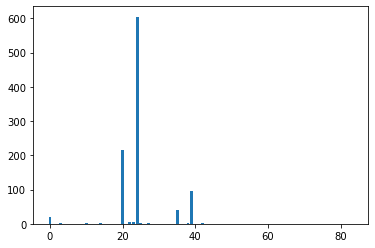

In [12]:
print([x_s, y_s, x_e, y_e, x_d, y_d], X.shape, get_n_routes(X))
start_time = time.perf_counter()

if x_d == -1:
    X = np.fliplr(X)
if y_d == -1:
    X = np.flipud(X)

unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)
boot_sample_list.append(boot_sample_out)

#best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
#best_route_list.append(best_route)

print('time (s): {}'.format(time.perf_counter()-start_time))

plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.show()

In [13]:
X

array([[435.,   0.,   0.,   0.],
       [384.,  27.,   0.,   0.],
       [148., 106.,   0.,   0.],
       [  0.,  91.,   0.,   0.],
       [  0.,  87.,  43.,   0.],
       [ 42.,   0.,  96.,  12.],
       [ 12.,  84.,   0., 118.]])

In [14]:
boot_sample_out_selected = boot_sample_out[np.where(boot_sample_out[:,1]>5)[0]]
boot_sample_out_selected

array([[  0,  20],
       [ 20, 216],
       [ 23,   6],
       [ 24, 605],
       [ 35,  40],
       [ 39,  97]])

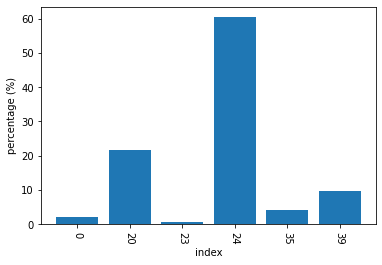

In [15]:
plt.bar([str(x) for x in boot_sample_out_selected[:,0]], boot_sample_out_selected[:,1]/1000*100)
plt.xticks(rotation=-90)
plt.xlabel('index')
plt.ylabel('percentage (%)')
plt.show()

In [16]:
out_name = 'out_exp/grid2_example'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_out_selected, f)

In [17]:
out_name = 'out_exp/grid2_example'
with open(out_name, 'rb') as f:
    grid2_example = pickle.load(f)

In [18]:
available_route_list = []
for idx in grid2_example[:,0]:
    available_route_list.append(unique_paths[idx])

In [19]:
out_name = 'out_exp/grid2_available_route_list'
with open(out_name, 'wb') as f:
    pickle.dump(available_route_list, f)

In [20]:
available_route_list = []
available_route_list.append(best_route)

In [21]:
out_name = 'out_exp/grid2_best_route_list'
with open(out_name, 'wb') as f:
    pickle.dump(available_route_list, f)

In [22]:
X = grid_list[1]
exp_grid_list = [X]

In [23]:
out_name = 'out_exp/exp_grid_list2'
with open(out_name, 'wb') as f:
    pickle.dump(exp_grid_list, f)